In [50]:
import statsmodels.api as sm
from datetime import datetime, date, timedelta
import yfinance as yf

import numpy as np 
import pandas as pd

import random

tickers = pd.read_csv('../Datas/tickerc.csv', low_memory=False)

list_tickers = tickers['MSFT'].tolist()
choice = random.sample(list_tickers, 5)
choice


start_date = date.today() - timedelta(weeks=52*2)
end_date = date.today()
df = yf.download(choice,
    start=start_date,
    end = end_date
)['Adj Close']
df.head()

[*********************100%***********************]  5 of 5 completed

2 Failed downloads:
- AZUMF: No timezone found, symbol may be delisted
- KPEL.XBOM: No timezone found, symbol may be delisted


,AZUMF,CTRU,KPEL.XBOM,PUCAX,VRNA
Date,,,,,
2021-03-16 00:00:00,NaN,NaN,NaN,9.373396,8.60
2021-03-17 00:00:00,NaN,NaN,NaN,9.373396,8.51
2021-03-18 00:00:00,NaN,NaN,NaN,9.327669,8.29
2021-03-19 00:00:00,NaN,NaN,NaN,9.327669,8.30
2021-03-22 00:00:00,NaN,NaN,NaN,9.336817,8.28


['LICRX', '0367.XHKG', 'EDOM', 'SUDTIND_B.XBOM', 'BTCX.XSTO']

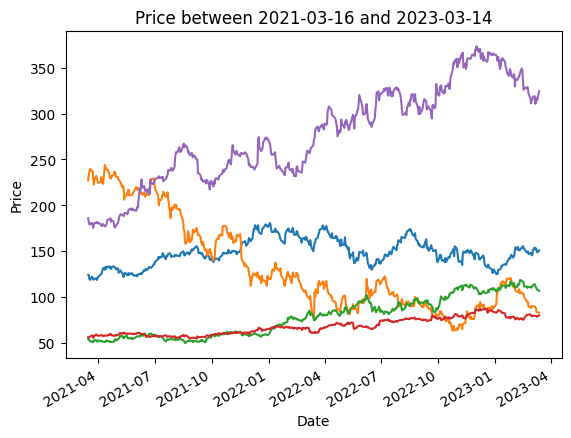

In [3]:
import matplotlib.pyplot as plt
plt.title('Price between {} and {}'.format(
    start_date.isoformat(),
    end_date.isoformat()
))
df['AAPL'].plot()
df['BABA'].plot()
df['XOM'].plot()
df['GIS'].plot()
df['LLY'].plot()
['AAPL','BABA', 'XOM', 'GIS','LLY']
plt.ylabel('Price')
plt.xlabel('Date');

# Saving dataFrame to pickle file

In [9]:
display(df.head())
df.to_pickle('../Datas/tickers21-23')

,AAPL,BABA,GIS,LLY,XOM
Date,,,,,
2021-03-16,124.076462,226.929993,55.907032,185.688400,54.054691
2021-03-17,123.276100,233.339996,55.916451,181.632233,54.292450
2021-03-18,119.096413,236.429993,56.396618,178.908691,51.951389
2021-03-19,118.562836,239.789993,56.556671,179.258850,51.658768
2021-03-22,121.922401,237.119995,57.855968,180.766541,51.128361


# finance things about portfolio optimisations
return / expected return / expected volatility / sharpe ratio
return over risks

In [7]:
#return over time 
log_return = np.log(1 + df.pct_change())
#generate random weights 
random_wieghts = np.array(np.random.random(numbers_symbols))
#generate rebalance weights 
rebalance = random_wieghts / np.sum(random_wieghts)

#calculate the expected returns , annualized (252)
exp_ret = np.sum((log_return.mean() * rebalance) * 252)

# calculate expected volatility, annualized (matrix mult)
exp_vol = np.sqrt(
    np.dot(
    rebalance.T,
    np.dot(
    log_return.cov() * 252,
    rebalance
    )
    )
)

# calculate the sharpe ratio (without risk free rate)
sharpe_ratio = (exp_ret - .01) / exp_vol

#metrics in a df to be more clear 
mertics_df = pd.DataFrame(data = {
    'Expected portfolio return' : exp_ret,
    'Expected portfolio volatility' : exp_vol,
    'Portfolio Sharpe Ratio' : sharpe_ratio
}, index=[0])
display(mertics_df)

,Expected portfolio return,Expected portfolio volatility,Portfolio Sharpe Ratio
0,-0.114379,0.318026,-0.391096
